# Prueba 1
## Nombre: Ricardo Vinicio Jara Jara

## Objetivo:

##### Consolidar los conocimientos adquiridos en clase para los metodos de busqueda sin razonamiento.

#### + Diseñe y desarrolle un mapa de nodos para encontrar la ruta mas corta del parque centra 
![Texto alternativo](https://raw.githubusercontent.com/RicardoVinicioJara/Deberes-IA/master/Fotos/mapa.png)

#### + Generar un arbol de nodos que represente los datos del mapa para realizar la busqueda.
![Texto alternativo](https://raw.githubusercontent.com/RicardoVinicioJara/Deberes-IA/master/Fotos/1.jpeg)







# Calculos 
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
## Calculos De Busqueda Por Amplitud

#### + Calculos Amplitud

![Texto alternativo](https://raw.githubusercontent.com/RicardoVinicioJara/Deberes-IA/master/Fotos/amplitud.jpeg)

#### + Programa y graficos

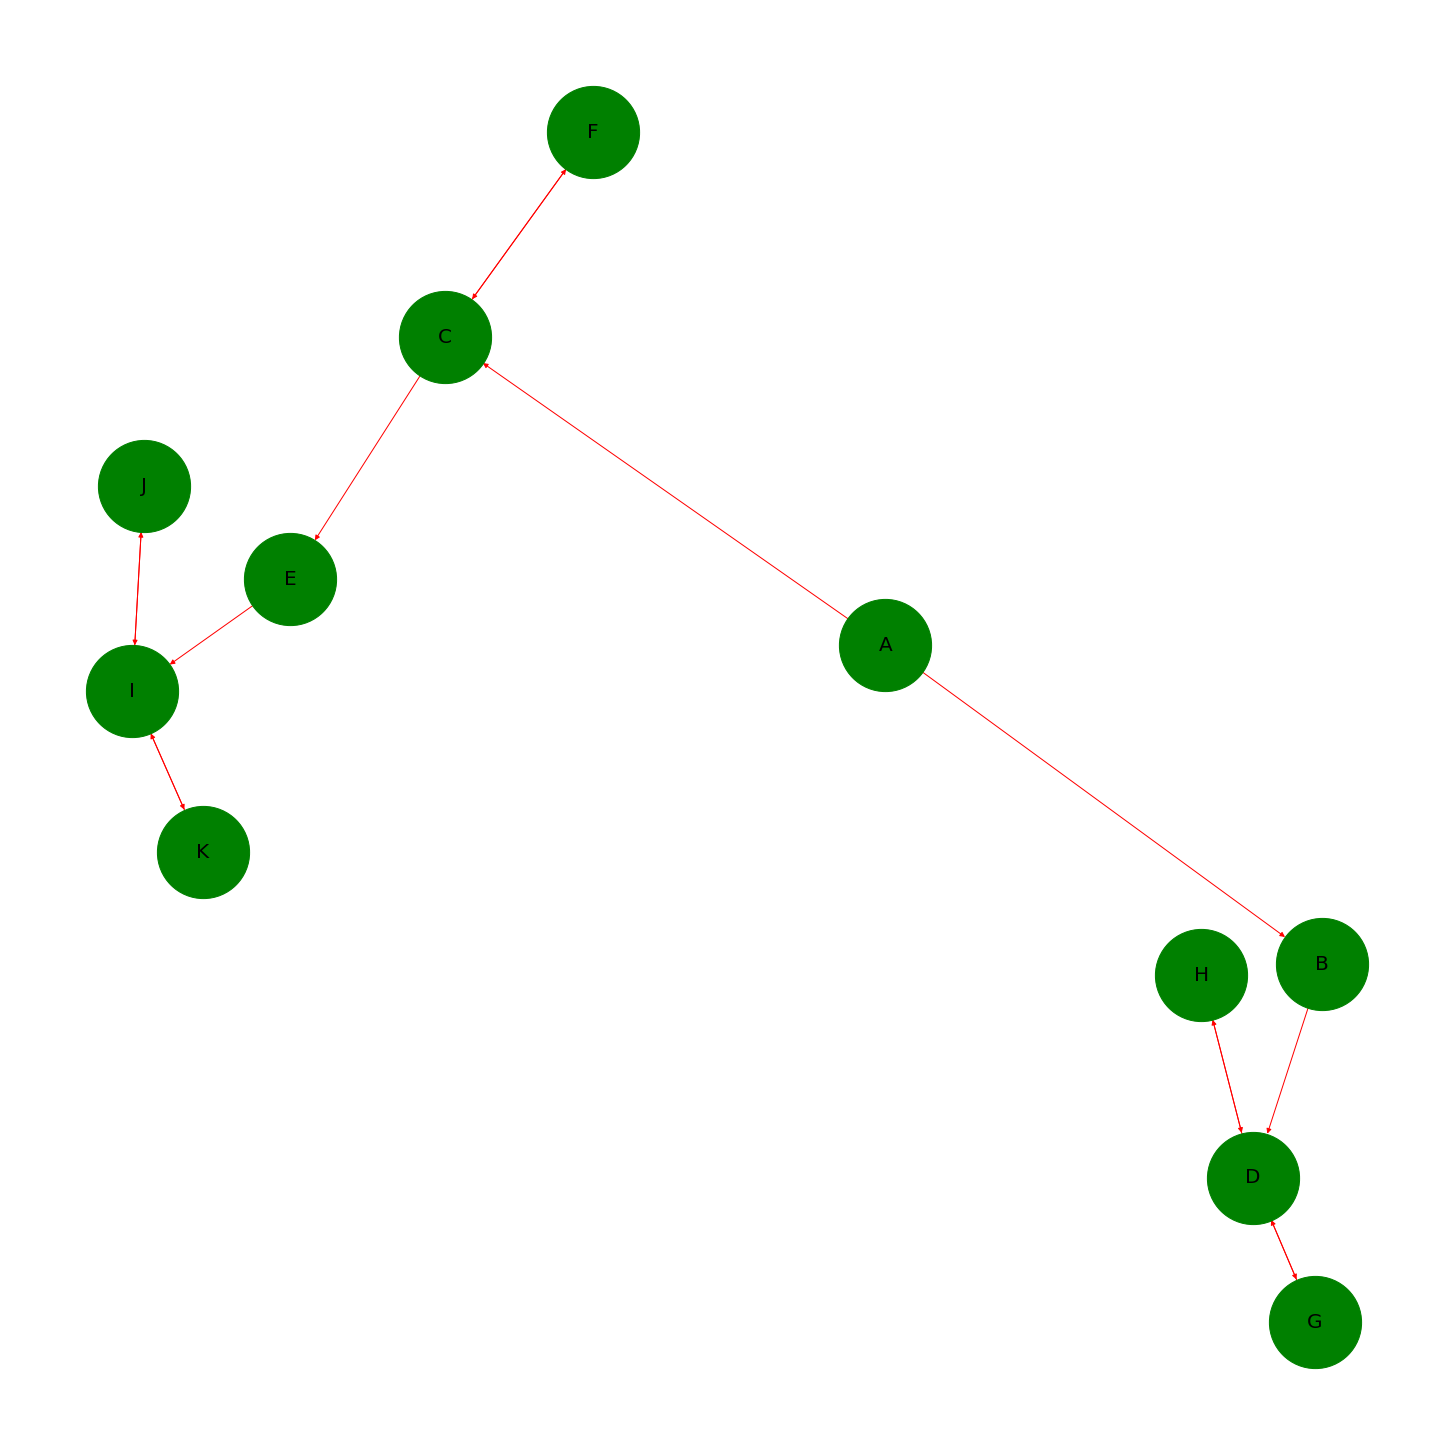

In [164]:

# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verificar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
import networkx as nx
from IPython.display import Image, display

g=nx.DiGraph()
  
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution,g):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            g.add_node(node.data,color='red')
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
                    g.add_edge(node.data,child)
                    if child.on_list(visited_nodes):
                        g.add_node(node.data,color='red')
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'A': {'B', 'C'},
        'B': {'D'},
        'D': {'G','H'},
        'C': {'E','F'},
        'E': {'I'},
        'I': {'J', 'K'},
        'F': {'C'},
        'G': {'D'},
        'H': {'D'},
        'J': {'I'},
        'K': {'I'}
    }

    init_state = 'A'
    solution = 'K'
    solution_node = search_Amplitud_solution(connections, init_state, solution,g)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        display(HTML('<h1 align="center">'+ "Res: "+str(result)+'</h1>'))
        #print(str(result))
    else:
        print("No hay solucion !!!!")
    
    graf = nx.DiGraph()
    graf.add_nodes_from(connections)
    for valor, listaValor in connections.items():
        for a in listaValor:  
            graf.add_edge(valor,a,size=100)
    
    plt.figure(figsize=(20,20)) 
    nx.draw_spring(graf,
                 node_color="green",
                 edge_color="red",
                 font_size=20,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
    )
    plt.show()
    p=nx.drawing.nx_pydot.to_pydot(g)
    p.write_png("1.png")
    display(HTML('<img src="1.png" style="display: block;  margin-left: auto;  margin-right: auto;  width: 50%;">'))
    
    

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
## + Galculos Costo

![Texto alternativo](https://raw.githubusercontent.com/RicardoVinicioJara/Deberes-IA/master/Fotos/costo.jpeg)

## Costo:  Central Park [A] >> La Perla Park [K]

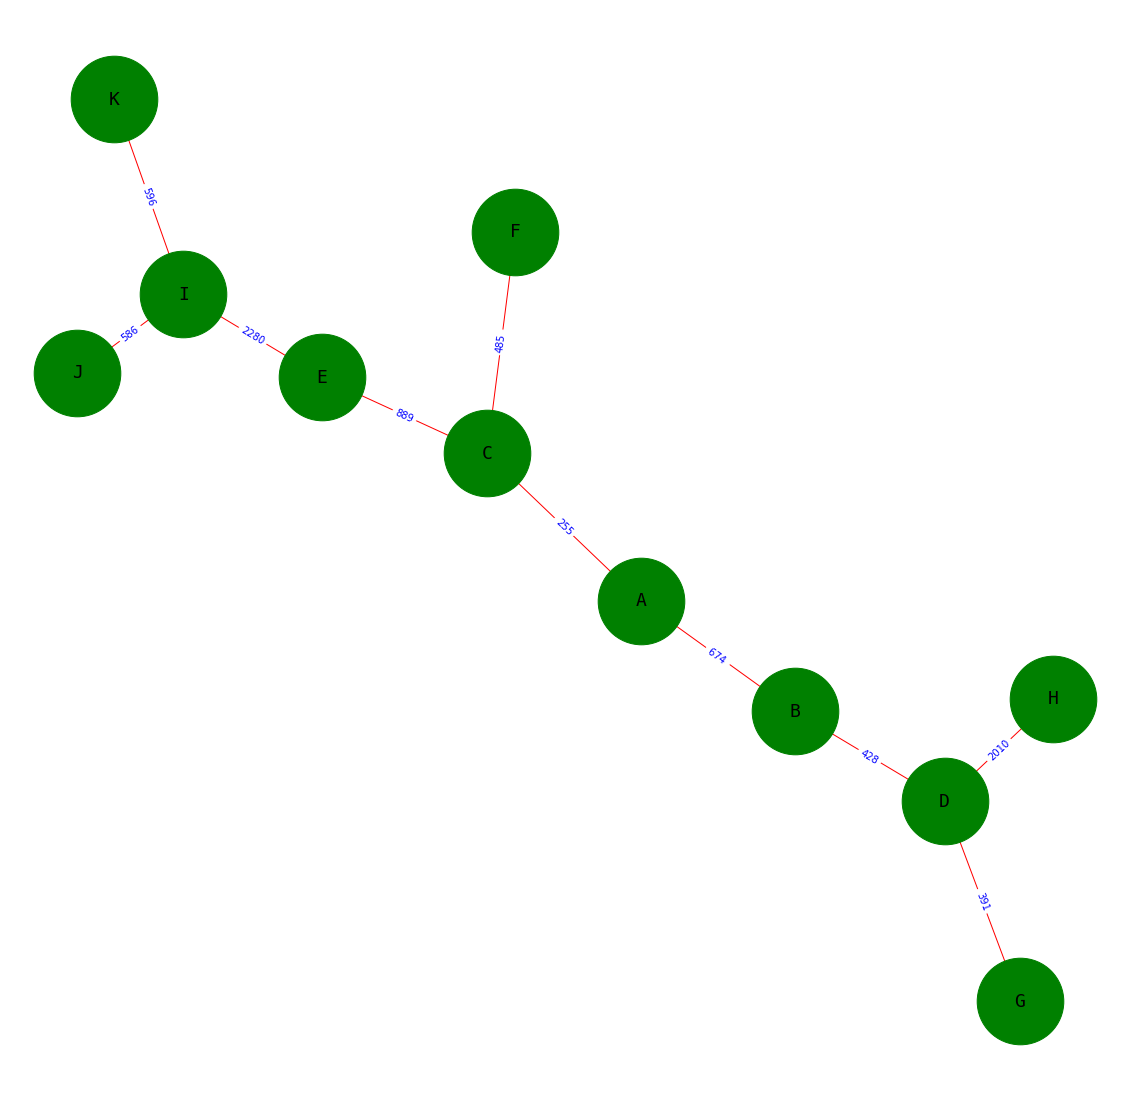

In [244]:

# Busqueda por costo.

# Creamos la clase Nodo
import networkx as nx
from IPython.display import Image, display
from IPython.core.display import display, HTML
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

# Implementacion del metodo de busqueda por costo
g=nx.DiGraph()

    

# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution,g):
    var=""
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            g.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        g.add_edge(node.data,child,label=child.cost)
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        g.add_edge(node.data,child,label=child.cost)
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'A': {'B':287, 'C':190},
        'B': {'D':428},
        'E': {'I':2280},
        'C': {'F':485, 'E':889},
        'D': {'G':390,'H':2010},
        'F': {'C':485},
        'G': {'D':390},
        'H': {'D':2010},
        'I': {'J':586, 'K':596},
        'J': {'I':586},
        'K': {'I':596}
    }

    init_state = 'A'
    solution = 'K'
    solution_node = search_costo_solucion(connections, init_state, solution, g)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        display(HTML('<h1 align="center">'+ "Res: "+str(result)+'</h1>'))
        display(HTML('<h1 align="center">'+ "Costo: "+str(solution_node.cost)+'</h1>'))
        #print(result)
        #print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
    
    import matplotlib.pyplot as plt
    import networkx as nx
    import warnings
    gr= nx.Graph()

    gr.add_edge("A", "B", weight = 2.5,label='674 ')
    gr.add_edge("A", "C", weight = 2.5,label ='255')
    gr.add_edge("B", "D", weight = 2.5,label ='428')
    gr.add_edge("D", "G", weight = 2.5,label ='391')
    gr.add_edge("D", "H", weight = 2.5,label ='2010')
    gr.add_edge("C", "E", weight = 2.5,label ='889')
    gr.add_edge("C", "F", weight = 2.5, label ='485')
    gr.add_edge("E", "I", weight = 3.2, label ='2280')
    gr.add_edge("I", "J", weight = 3,label ='586')
    gr.add_edge("I", "K", weight = 3,label ='596')


    weights = [gr[u][v]['weight'] for u,v in gr.edges()]
    etiquetas = [gr[u][v]['label'] for u,v in gr.edges()]
    plt.figure(4,figsize=(20,20)) 
    pos =nx.spring_layout(gr)
    nx.draw_networkx_nodes(gr, pos, node_size=7500, node_color='green') #nodos
    nx.draw_networkx_edges(gr, pos, edge_color='red') 
    nx.draw_networkx_edge_labels(gr,pos,edge_labels={(u,v):gr[u][v]['label'] for u,v in gr.edges()} ,font_color='Blue')

    nx.draw_networkx_labels(gr, pos, font_family='monospace',
            node_color="green",
            edge_color="red",
            font_size=18,
            width=4, 
            with_labels=True, 
            node_size=7500) 
    plt.axis('off')

    plt.show()
    p=nx.drawing.nx_pydot.to_pydot(g)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    p.write_png("2.png")
    display(HTML('<img src="2.png" style="display: block;  margin-left: auto;  margin-right: auto;  width: 50%;">'))


# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
## + Calculos Profundidad
![Texto alternativo](https://raw.githubusercontent.com/RicardoVinicioJara/Deberes-IA/master/Fotos/profundidad.jpeg)

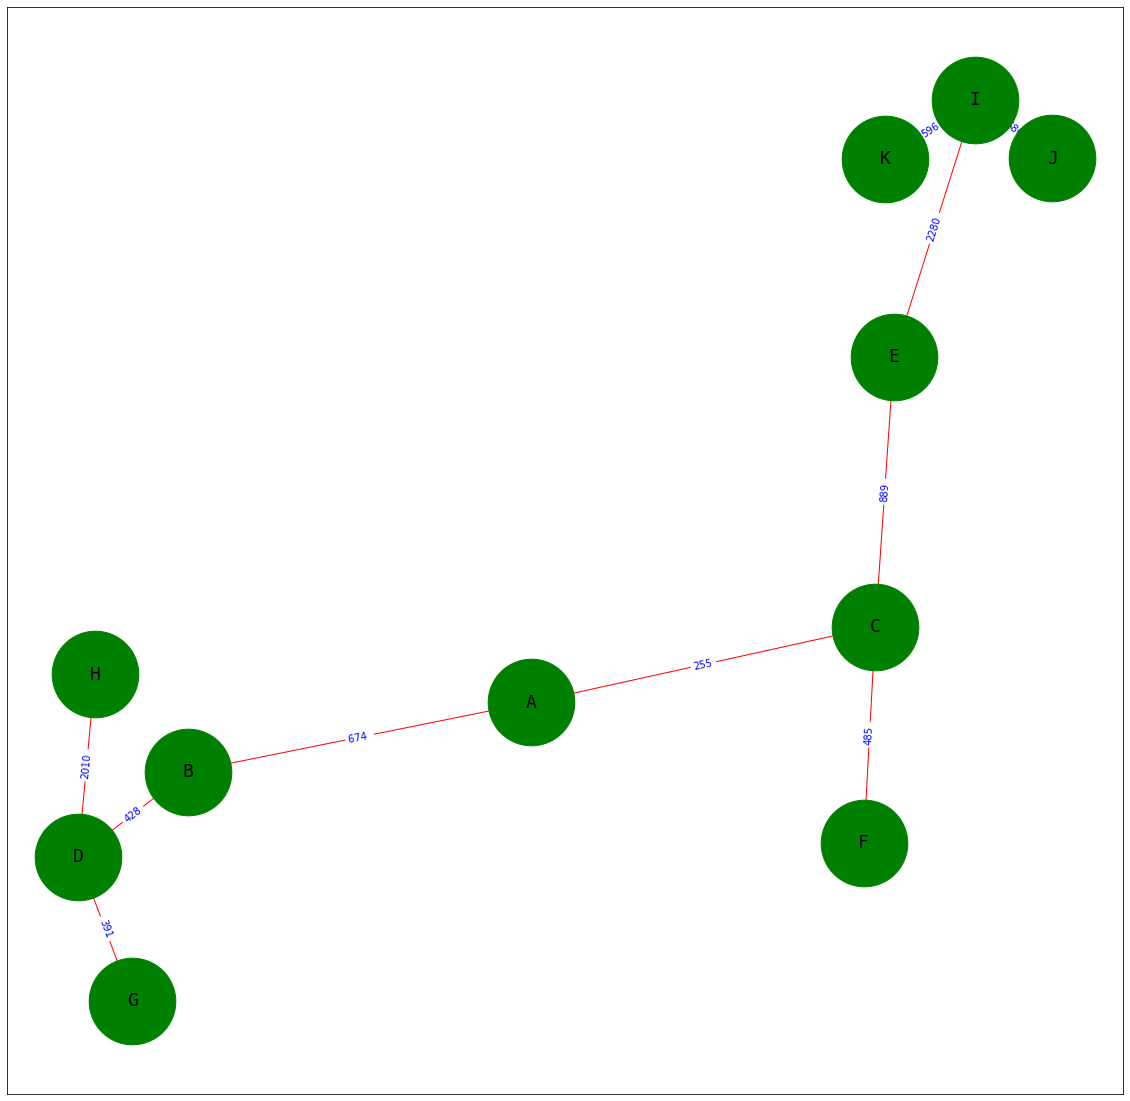

In [258]:
# Busqueda en Profundidad

# Creamos la clase Nodo

class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed
    
    

    def __str__(self): # Igual al toString Java
        return str(self.data)

    #Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

from IPython.display import Image, display

g=nx.DiGraph()

if __name__ == "__main__":
    connections = {
        'A': {'B':287, 'C':190},
        'B': {'D':428},
        'E': {'I':2280},
        'C': {'F':485, 'E':404},
        'D': {'G':390,'H':2010},
        'F': {'C':485},
        'G': {'D':390},
        'H': {'D':2010},
        'I': {'J':586, 'K':10},
        'J': {'I':586},
        'K': {'I':596}
    }

def search_profundidad(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=costo
        g.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=cost
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        aux = 0
        aux1 = 0
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                costo=costo+son.cost
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad(son, solution, visited,con,costo,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = 'A' # Creamos un estado inicial
solution = 'K' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad(init_node, solution, visited,connections,costo,g) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    display(HTML('<h1 align="center">'+ "Res: "+str(result)+'</h1>'))
    display(HTML('<h1 align="center">'+ "Costo: "+str(fcosto)+'</h1>'))
    #print(result)
    #print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")


plt.figure(4,figsize=(20,20)) 
graf.add_nodes_from(connections)
for valor, listaValor in connections.items():
    for a in listaValor:
        graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
pos = nx.spring_layout(graf)

#print(" ")
labels = nx.get_edge_attributes(graf,'length')
#print(labels)
nx.draw_networkx_nodes(gr, pos, node_size=7500, node_color='green') #nodos
nx.draw_networkx_edges(gr, pos, edge_color='red') 
nx.draw_networkx_edge_labels(gr,pos,edge_labels={(u,v):gr[u][v]['label'] for u,v in gr.edges()} ,font_color='Blue')
nx.draw_networkx_labels(gr, pos, font_family='monospace',node_color="green", edge_color="red", font_size=18, width=4, 
                        with_labels=True, 
                        node_size=8500) 
plt.show()

p=nx.drawing.nx_pydot.to_pydot(g)
for i, edge in enumerate(p.get_edges()):
    edge.set_label(str(edge.get_label()))
p.write_png("3.png")
display(HTML('<img src="3.png" style="display: block;  margin-left: auto;  margin-right: auto;  width: 40%;">'))

